In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib.pylab import style #自定义图表风格
style.use('ggplot')

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']
# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

#pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  #自相关图、偏自相关图
from statsmodels.tsa.stattools import adfuller as ADF #平稳性检验
from statsmodels.stats.diagnostic import acorr_ljungbox #白噪声检验
import statsmodels.api as sm #D-W检验,一阶自相关检验
from statsmodels.graphics.api import qqplot #画QQ图,检验一组数据是否服从正态分布
from statsmodels.tsa.arima_model import ARIMA

In [2]:
DigitalEconomyScale=pd.read_excel('C:\\Users\\hp\\Desktop\\learn_torch\\dataset\\数字经济规模.xls',index_col='年份')
DigitalEconomyScale.head()
DigitalEconomyScale.tail()

,数字经济规模（万亿元）
年份,
2005,2.6
2008,4.8
2011,9.5
2014,16.2
2015,18.6


,数字经济规模（万亿元）
年份,
2018,31.3
2019,35.8
2020,39.2
2021,41.3
2022,45.5


In [3]:
DigitalEconomyScale.info()
print('-----')
DigitalEconomyScale.数字经济规模（万亿元）=DigitalEconomyScale.数字经济规模（万亿元）.astype('float')
DigitalEconomyScale.info()



SyntaxError: invalid character in identifier (<ipython-input-3-93e81f78ce35>, line 3)

In [4]:
DigitalEconomyScale=pd.read_excel('C:\\Users\\hp\\Desktop\\learn_torch\\dataset\\数字经济规模.xls',index_col='年份')
DigitalEconomyScale.head()
DigitalEconomyScale.tail()

,数字经济规模
年份,
2005,2.6万亿元
2008,4.8万亿元
2011,9.5万亿元
2014,16.2万亿元
2015,18.6万亿元


,数字经济规模
年份,
2018,31.3万亿元
2019,35.8万亿元
2020,39.2万亿元
2021,41.3万亿元
2022,45.5万亿元


In [5]:
DigitalEconomyScale.info()
print('-----')
DigitalEconomyScale.数字经济规模=DigitalEconomyScale.数字经济规模.astype('float')
DigitalEconomyScale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2005 to 2022
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   数字经济规模  12 non-null     object
dtypes: object(1)
memory usage: 192.0+ bytes
-----


ValueError: could not convert string to float: '2.6万亿元'

In [6]:
DigitalEconomyScale=pd.read_excel('C:\\Users\\hp\\Desktop\\learn_torch\\dataset\\数字经济规模.xls',index_col='年份')
DigitalEconomyScale.head()
DigitalEconomyScale.tail()

,数字经济规模_万亿元
年份,
2005,2.6
2008,4.8
2011,9.5
2014,16.2
2015,18.6


,数字经济规模_万亿元
年份,
2018,31.3
2019,35.8
2020,39.2
2021,41.3
2022,45.5


In [7]:
DigitalEconomyScale.info()
print('-----')
DigitalEconomyScale.数字经济规模_万亿元=DigitalEconomyScale.数字经济规模_万亿元.astype('float')
DigitalEconomyScale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2005 to 2022
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   数字经济规模_万亿元  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes
-----
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2005 to 2022
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   数字经济规模_万亿元  12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='年份'>

<Figure size 720x360 with 0 Axes>

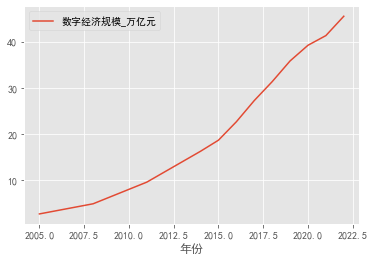

In [8]:
plt.figure(figsize=(10,5))
DigitalEconomyScale.plot()
plt.show()

#解读：具有单调递增趋势，则是非平稳序列。

D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


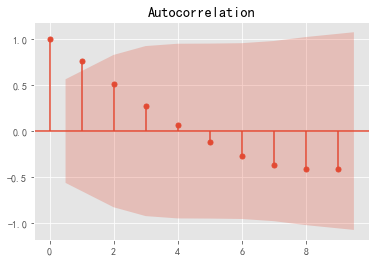

In [10]:
plot_acf(DigitalEconomyScale,lags=9).show()

#解读：自相关系数长期大于零，没有趋向于零，说明序列间具有很强的长期相关性。

In [11]:
#方法：单位根检验

print('原始序列的ADF检验结果为：',ADF(DigitalEconomyScale.数字经济规模_万亿元))

#解读：P值小于显著性水平α（0.05），接受原假设（非平稳序列），说明原始序列是非平稳序列。

原始序列的ADF检验结果为： (-2.9473117629211174, 0.040116440901975955, 4, 7, {'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}, 11.529239866045447)


<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='年份'>

<Figure size 720x360 with 0 Axes>

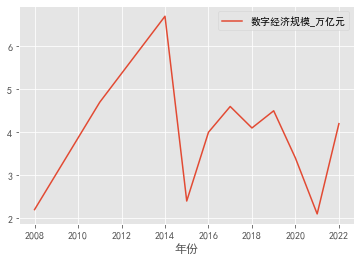

原始序列的ADF检验结果为： (-3.6930411413730355, 0.004212108295931534, 0, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, 20.70187483135212)


D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


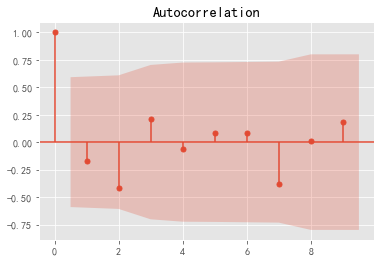

In [13]:
d1_DigitalEconomyScale=DigitalEconomyScale.diff(periods=1, axis=0).dropna()

#时序图
plt.figure(figsize=(10,5))
d1_DigitalEconomyScale.plot()
plt.show()
#解读：在均值附件比较平稳波动

#自相关图
plot_acf(d1_DigitalEconomyScale,lags=9).show()
#解读：有短期相关性，但趋向于零。

#平稳性检验
print('原始序列的ADF检验结果为：',ADF(d1_DigitalEconomyScale.数字经济规模_万亿元))

#解读：P值小于显著性水平α（0.05），拒绝原假设（非平稳序列），说明一阶差分序列是平稳序列。


In [14]:
print('一阶差分序列的白噪声检验结果为：',acorr_ljungbox(d1_DigitalEconomyScale,lags=1))#返回统计量、P值

#解读：p值小于0.05，拒绝原假设（纯随机序列），说明一阶差分序列是非白噪声。

一阶差分序列的白噪声检验结果为： (array([0.41407625]), array([0.51990778]))


D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':
D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


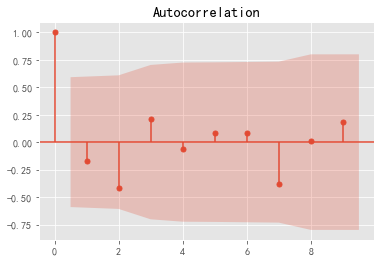

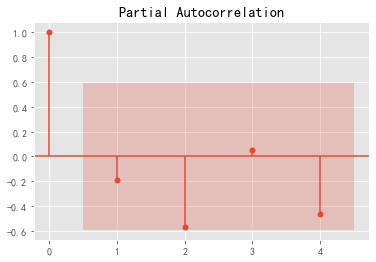

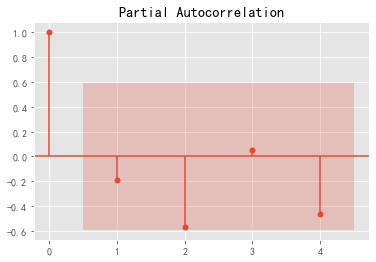

In [16]:
d1_DigitalEconomyScale=DigitalEconomyScale.diff(periods=1, axis=0).dropna()

#自相关图
plot_acf(d1_DigitalEconomyScale,lags=9).show()

#解读：有短期相关性，但趋向于零。

#偏自相关图
plot_pacf(d1_DigitalEconomyScale,lags=4).show()


#偏自相关图
plot_pacf(d1_DigitalEconomyScale,lags=4).show()

#解读：自相关图，1阶截尾；偏自相关图，拖尾。则ARIMA(p,d,q)=ARIMA(0,1,1)

In [17]:
pmax=int(len(d1_DigitalEconomyScale)/10) #一般阶数不超过length/10
qmax=int(len(d1_DigitalEconomyScale)/10) #一般阶数不超过length/10
pmax
qmax

1

1

In [18]:
bic_matrix=[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(DigitalEconomyScale,(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g

In [19]:
bic_matrix=pd.DataFrame(bic_matrix)
bic_matrix

,0,1
0,41.490622,42.289339
1,43.534651,NaN


In [20]:
bic_matrix.stack()

0  0    41.490622
   1    42.289339
1  0    43.534651
dtype: float64

In [21]:
p,q=bic_matrix.stack().idxmin() #最小值的索引
print('用BIC方法得到最优的p值是%d,q值是%d'%(p,q))

用BIC方法得到最优的p值是0,q值是0


In [23]:
pmax=int(len(d1_DigitalEconomyScale)/10) #一般阶数不超过length/10
qmax=int(len(d1_DigitalEconomyScale)/10) #一般阶数不超过length/10

aic_matrix=[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(DigitalEconomyScale,(p,1,q)).fit().aic)
        except:
            tmp.append(None)
    aic_matrix.append(tmp)
aic_matrix=pd.DataFrame(aic_matrix)
p,q=aic_matrix.stack().idxmin() #最小值的索引

D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g

In [24]:
#创建模型
model=ARIMA(DigitalEconomyScale,(0,1,1)).fit()
#查看模型报告
model.summary2()


D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
==================================================================
Model:               ARIMA            BIC:                 42.2893
Dependent Variable:  D.数字经济规模_万亿元     Log-Likelihood:      -17.548
Date:                2023-04-10 22:17 Scale:               1.0000 
No. Observations:    11               Method:              css-mle
Df Model:            2                Sample:              1      
Df Residuals:        9                                     2      
Converged:           1.0000           S.D. of innovations: 1.065  
No. Iterations:      4.0000           HQIC:                40.343 
AIC:                 41.0957                                      
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               4.0175   0.0891 45.0922 0.0000  3.8429  4.1921
ma.L1.D.数字经济规模_万亿元 -1.0000   0.4659 -2.1466 0.0318 -1.9131 -0.0869
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
MA.1          1.0000             0.0000           1.0000             0.0000
==================================================================

"""

D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':
D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


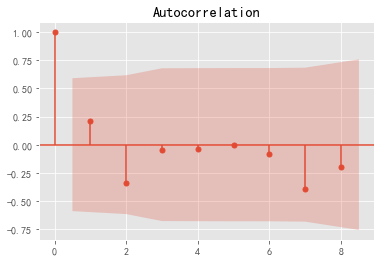

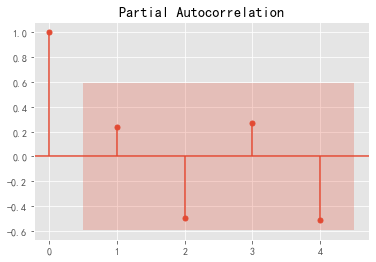

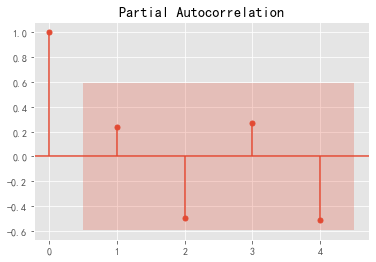

In [25]:
resid=model.resid

#自相关图
plot_acf(resid,lags=8).show()

#解读：有短期相关性，但趋向于零。

#偏自相关图
plot_pacf(resid,lags=4).show()

#偏自相关图
plot_pacf(resid,lags=4).show()

In [26]:
print('D-W检验的结果为：',sm.stats.durbin_watson(resid.values))  

#解读：不存在一阶自相关

D-W检验的结果为： 1.2253027677513042


In [27]:
# 方法一
print('残差序列的白噪声检验结果为：',acorr_ljungbox(resid,lags=1))#返回统计量、P值

#解读：残差是白噪声

残差序列的白噪声检验结果为： (array([0.65353617]), array([0.41885124]))


D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [45]:
forecast=pd.Series(model.forecast(5)[0],index=pd.date_range('2022',periods=5,freq='D'))
forecast

2022-01-01    50.767832
2022-01-02    54.785315
2022-01-03    58.802797
2022-01-04    62.820280
2022-01-05    66.837762
Freq: D, dtype: float64

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

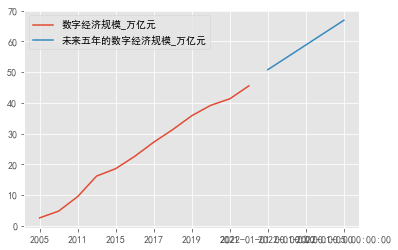

In [46]:
data=pd.concat((DigitalEconomyScale,forecast),axis=0)
data.columns=['数字经济规模_万亿元','未来五年的数字经济规模_万亿元']
plt.figure(figsize=(10,5))
data.plot()
plt.show()

In [47]:
#预测
print('未来五年的数字经济规模_万亿元：')
model.forecast(7) #预测、标准差、置信区间

未来五年的数字经济规模_万亿元：


(array([50.76783212, 54.78531464, 58.80279715, 62.82027966, 66.83776217,
        70.85524468, 74.8727272 ]),
 array([1.06541899, 1.06541899, 1.06541899, 1.06541899, 1.06541899,
        1.06541899, 1.06541899]),
 array([[48.67964928, 52.85601496],
        [52.69713179, 56.87349748],
        [56.71461431, 60.89097999],
        [60.73209682, 64.9084625 ],
        [64.74957933, 68.92594501],
        [68.76706184, 72.94342753],
        [72.78454435, 76.96091004]]))

D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


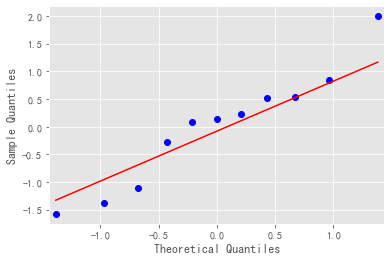

In [48]:
qqplot(resid, line='q', fit=True).show() 

#解读：残差服从正态分布，均值为零，方差为常数

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from matplotlib.pylab import style #自定义图表风格
style.use('ggplot')

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']
# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

#pip install statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  #自相关图、偏自相关图
from statsmodels.tsa.stattools import adfuller as ADF #平稳性检验
from statsmodels.stats.diagnostic import acorr_ljungbox #白噪声检验
import statsmodels.api as sm #D-W检验,一阶自相关检验
from statsmodels.graphics.api import qqplot #画QQ图,检验一组数据是否服从正态分布
from statsmodels.tsa.arima_model import ARIMA

In [2]:
DigitalEconomyScale=pd.read_excel('C:\\Users\\hp\\Desktop\\learn_torch\\dataset\\数字经济规模.xls',index_col='年份')
DigitalEconomyScale.head()
DigitalEconomyScale.tail()

,数字经济规模_万亿元
年份,
2014,16.2
2015,18.6
2016,22.6
2017,27.2
2018,31.3


,数字经济规模_万亿元
年份,
2018,31.3
2019,35.8
2020,39.2
2021,41.3
2022,45.5


In [3]:
DigitalEconomyScale.info()
print('-----')
DigitalEconomyScale.数字经济规模_万亿元=DigitalEconomyScale.数字经济规模_万亿元.astype('float')
DigitalEconomyScale.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 2014 to 2022
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   数字经济规模_万亿元  9 non-null      float64
dtypes: float64(1)
memory usage: 144.0 bytes
-----
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 2014 to 2022
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   数字经济规模_万亿元  9 non-null      float64
dtypes: float64(1)
memory usage: 144.0 bytes


<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='年份'>

<Figure size 720x360 with 0 Axes>

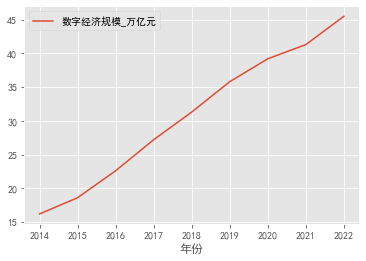

In [4]:
plt.figure(figsize=(10,5))
DigitalEconomyScale.plot()
plt.show()

#解读：具有单调递增趋势，则是非平稳序列。

D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


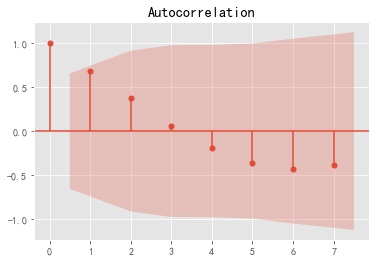

In [6]:
plot_acf(DigitalEconomyScale,lags=7).show()

#解读：自相关系数长期大于零，没有趋向于零，说明序列间具有很强的长期相关性。

In [7]:
#方法：单位根检验

print('原始序列的ADF检验结果为：',ADF(DigitalEconomyScale.数字经济规模_万亿元))

#解读：P值大于显著性水平α（0.05），接受原假设（非平稳序列），说明原始序列是非平稳序列

原始序列的ADF检验结果为： (-0.13030300896406713, 0.9463353345369139, 0, 8, {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}, 16.77297196301607)


<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='年份'>

<Figure size 720x360 with 0 Axes>

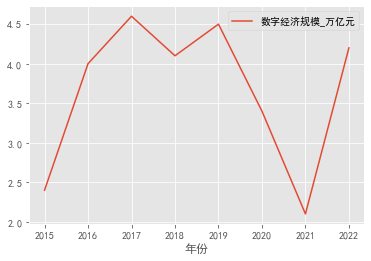

原始序列的ADF检验结果为： (-2.5342244476074787, 0.10736762461157578, 0, 7, {'1%': -4.9386902332361515, '5%': -3.477582857142857, '10%': -2.8438679591836733}, 16.667816256521387)


D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


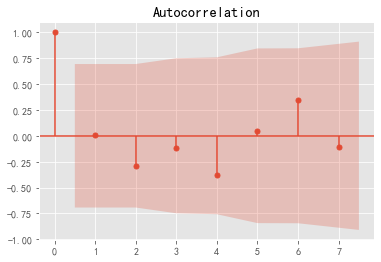

In [9]:
d1_DigitalEconomyScale=DigitalEconomyScale.diff(periods=1, axis=0).dropna()

#时序图
plt.figure(figsize=(10,5))
d1_DigitalEconomyScale.plot()
plt.show()
#解读：在均值附件比较平稳波动

#自相关图
plot_acf(d1_DigitalEconomyScale,lags=7).show()
#解读：有短期相关性，但趋向于零。

#平稳性检验
print('原始序列的ADF检验结果为：',ADF(d1_DigitalEconomyScale.数字经济规模_万亿元))

#解读：P值小于显著性水平α（0.05），拒绝原假设（非平稳序列），说明一阶差分序列是平稳序列。

In [10]:
print('一阶差分序列的白噪声检验结果为：',acorr_ljungbox(d1_DigitalEconomyScale,lags=1))#返回统计量、P值

#解读：p值小于0.05，拒绝原假设（纯随机序列），说明一阶差分序列是非白噪声。

一阶差分序列的白噪声检验结果为： (array([8.72030298e-05]), array([0.99254926]))


D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':
D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


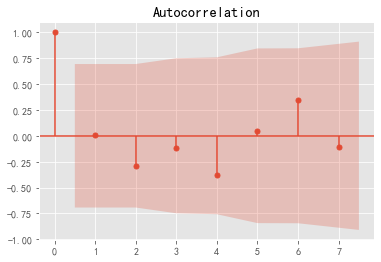

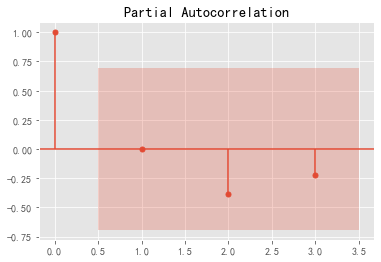

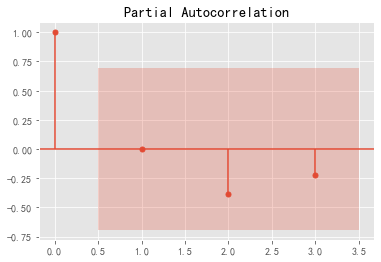

In [12]:
d1_DigitalEconomyScale=DigitalEconomyScale.diff(periods=1, axis=0).dropna()

#自相关图
plot_acf(d1_DigitalEconomyScale,lags=7).show()

#解读：有短期相关性，但趋向于零。

#偏自相关图
plot_pacf(d1_DigitalEconomyScale,lags=3).show()


#偏自相关图
plot_pacf(d1_DigitalEconomyScale,lags=3).show()

#解读：自相关图，1阶截尾；偏自相关图，拖尾。则ARIMA(p,d,q)=ARIMA(0,1,1)

In [17]:
pmax=int(len(d1_DigitalEconomyScale)/10) #一般阶数不超过length/10
qmax=int(len(d1_DigitalEconomyScale)/10) #一般阶数不超过length/10
pmax
qmax

0

0

In [18]:
bic_matrix=[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(DigitalEconomyScale,(p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g

In [19]:
bic_matrix=pd.DataFrame(bic_matrix)
bic_matrix

,0
0,24.923735


In [20]:
bic_matrix.stack()

0  0    24.923735
dtype: float64

In [21]:
p,q=bic_matrix.stack().idxmin() #最小值的索引
print('用BIC方法得到最优的p值是%d,q值是%d'%(p,q))

用BIC方法得到最优的p值是0,q值是0


In [22]:
pmax=int(len(d1_DigitalEconomyScale)/10) #一般阶数不超过length/10
qmax=int(len(d1_DigitalEconomyScale)/10) #一般阶数不超过length/10

aic_matrix=[]
for p in range(pmax+1):
    tmp=[]
    for q in range(qmax+1):
        try:
            tmp.append(ARIMA(DigitalEconomyScale,(p,1,q)).fit().aic)
        except:
            tmp.append(None)
    aic_matrix.append(tmp)
aic_matrix=pd.DataFrame(aic_matrix)
p,q=aic_matrix.stack().idxmin() #最小值的索引

D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g

In [23]:
#创建模型
model=ARIMA(DigitalEconomyScale,(0,0,1)).fit()
#查看模型报告
model.summary2()

D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
=================================================================
Model:              ARMA             BIC:                 65.5443
Dependent Variable: 数字经济规模_万亿元       Log-Likelihood:      -29.476
Date:               2023-04-12 17:07 Scale:               1.0000 
No. Observations:   9                Method:              css-mle
Df Model:           2                Sample:              0      
Df Residuals:       7                                     9      
Converged:          1.0000           S.D. of innovations: 5.631  
No. Iterations:     26.0000          HQIC:                63.676 
AIC:                64.9526                                      
-----------------------------------------------------------------
                    Coef.  Std.Err.   t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
const              30.9600   3.5613 8.6933 0.0000 23.9799 37.9402
ma.L1.数字经济规模_万亿元    0.9999   0.2903 3.4446 0.0006  0.4310  1.5689
-------------------------------------------------------------------------
                Real          Imaginary         Modulus         Frequency
-------------------------------------------------------------------------
MA.1          -1.0001            0.0000          1.0001            0.5000
=================================================================

"""

D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.
D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':
D:\Anaconda3\envs\pytorch2\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


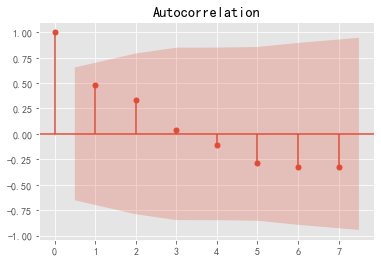

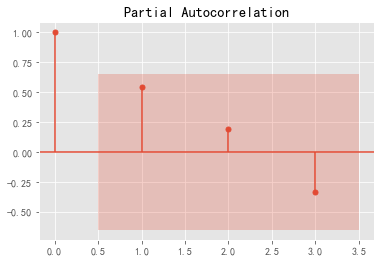

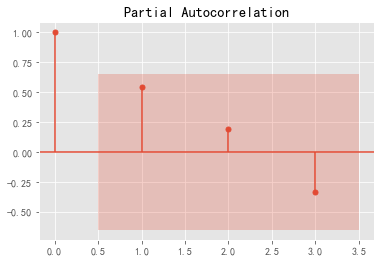

In [26]:
resid=model.resid

#自相关图
plot_acf(resid,lags=7).show()

#解读：有短期相关性，但趋向于零。

#偏自相关图
plot_pacf(resid,lags=3).show()

#偏自相关图
plot_pacf(resid,lags=3).show()

In [27]:
print('D-W检验的结果为：',sm.stats.durbin_watson(resid.values))  

#解读：存在一阶自相关

D-W检验的结果为： 0.3494189436644292


In [28]:
# 方法一
print('残差序列的白噪声检验结果为：',acorr_ljungbox(resid,lags=1))#返回统计量、P值

#解读：残差是白噪声

残差序列的白噪声检验结果为： (array([2.86840549]), array([0.09033433]))


D:\Anaconda3\envs\pytorch2\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [30]:
forecast=pd.Series(model.forecast(5)[0],index=pd.date_range('2023',periods=5,freq='D'))
forecast

2023-01-01    39.670368
2023-01-02    30.960037
2023-01-03    30.960037
2023-01-04    30.960037
2023-01-05    30.960037
Freq: D, dtype: float64

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

<Figure size 720x360 with 0 Axes>

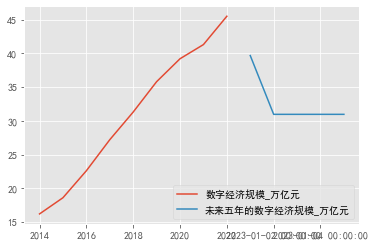

In [31]:
data=pd.concat((DigitalEconomyScale,forecast),axis=0)
data.columns=['数字经济规模_万亿元','未来五年的数字经济规模_万亿元']
plt.figure(figsize=(10,5))
data.plot()
plt.show()